# Problem Statement



> The dataset contains information about passengers trips using UBER cars. Here we have information about their trip date and time alongside the atitude and longitude of pickup and dropoff points and number of passengers. The aim of the project is to use a regression model to predict the fare price for a trip.



> Attributes:
1. Key - a unique identifier for each trip fare_amount.
2. the cost of each trip in usd.
3. pickup_datetime - date and time when the meter was engaged.
4. passenger_count - the number of passengers in the vehicle (driver entered value)
5. pickup_longitude - the longitude where the meter was engaged.
6. pickup_latitude - the latitude where the meter was engaged
7. dropoff_longitude - the longitude where the meter was disengaged.
8. dropoff_latitude - the latitude where the meter was disengaged.




## Downloading Dataset

> To download the dataset from Kaggle -> https://www.kaggle.com/nivednambiar/uber-fare-pricing-predictor/data



> To dowload the dataset from github: !https://raw.githubusercontent.com/MSadriAghdam/Uber_Fare_Pricing/main/uber.csv





In [1]:
!wget https://raw.githubusercontent.com/MSadriAghdam/Uber_Fare_Pricing/main/uber.csv

--2024-05-13 16:25:14--  https://raw.githubusercontent.com/MSadriAghdam/Uber_Fare_Pricing/main/uber.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23458139 (22M) [text/plain]
Saving to: ‘uber.csv’

uber.csv            100%[===================>]  22.37M  --.-KB/s    in 0.1s    

2024-05-13 16:25:15 (172 MB/s) - ‘uber.csv’ saved [23458139/23458139]



## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from math import radians, cos, sin, asin, sqrt
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading & Preparing dataset

In [3]:
df_raw = pd.read_csv('/content/uber.csv')
df_raw.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Unamed and key are irrelevant features. So i will remove them.

In [4]:
df_raw.drop(columns = ['Unnamed: 0','key'],inplace=True)

In [5]:
df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df_raw.shape

(200000, 7)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


Before preceeding towards EDA we are going to extract date and time from 'pickup_datetime' column. As seen above it is of type of object we will  firstly convert it in to datetime and then proceeds onward.

In [8]:
df_raw['pickup_datetime'] = pd.to_datetime(df_raw['pickup_datetime'],utc=True)

#splitting date and time into two columns.

df_raw['date'] = pd.to_datetime(df_raw['pickup_datetime']).dt.date
df_raw['time'] = pd.to_datetime(df_raw['pickup_datetime']).dt.time

#droping the original pickup_datetime column
df_raw.drop(columns = 'pickup_datetime',axis=1,inplace=True)
df_raw.reset_index(inplace=True)


In [9]:
df_raw.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


Now lets extract the day,month and year column from the date column

In [10]:
df_raw['day'] = df_raw['date'].apply(lambda x: x.strftime('%A'))
df_raw['month'] = df_raw['date'].apply(lambda x: x.month)
df_raw['year'] = df_raw['date'].apply(lambda x: x.year)

df_raw.drop('date',axis=1,inplace=True)
df_raw.head()


,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,day,month,year
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19:52:06,Thursday,5,2015
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20:04:56,Friday,7,2009
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21:45:00,Monday,8,2009
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,08:22:21,Friday,6,2009
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17:47:00,Thursday,8,2014


In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
 7   time               200000 non-null  object 
 8   day                200000 non-null  object 
 9   month              200000 non-null  int64  
 10  year               200000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 16.8+ MB


In [12]:
#lets convert time into morning, afternoon,night and midnight

def date_splitter(times):
    output = ''
    if dt.time(6,0,0) <= times <= dt.time(11,59,59):
        output = 'morning'
    elif dt.time(12,0,0) <= times <= dt.time(17,59,59):
        output = 'evening'
    elif dt.time(18,0,0) <= times <= dt.time(23,59,59):
        output = 'night'
    elif dt.time(0,0,1) <= times <= dt.time(5,59,59):
        output = 'mid_night'
    return output

In [13]:
df_raw['day_time'] = df_raw.time.apply(date_splitter)
df_raw = df_raw[df_raw['day_time'] != '']
df_raw.drop('time',inplace=True,axis=1)

<ipython-input-13-759c33856977>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop('time',inplace=True,axis=1)


In [14]:
df_raw.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day_time
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening


In [15]:
#as information for latitude and longitude is given i simply have to calculate distance

def calculate_distance(lat1, lat2, lon1, lon2):

	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)

	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))

	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371

	# calculate the result
	return(c * r)

df_raw['distance_travelled_(KM)']= df_raw.apply(lambda x: calculate_distance(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)


In [16]:
df_raw.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day_time,distance_travelled_(KM)
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night,1.683323
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night,2.457590
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night,5.036377
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning,1.661683
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening,4.475450




> Now data is prepared for Analysis and Modelling. We will Focus on EDA to Explore Hidden patterns and ternds from data.



## Exploratory Data Analysis

In [17]:
df=df_raw.copy()

In [18]:
df.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day_time,distance_travelled_(KM)
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night,1.683323
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night,2.457590
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night,5.036377
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning,1.661683
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening,4.475450


In [19]:
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,distance_travelled_(KM)
count,199921.00000,199921.000000,199921.000000,199921.000000,199920.000000,199920.000000,199921.000000,199921.000000,199921.000000,199920.000000
mean,99999.26457,11.358923,-72.528175,39.936176,-72.525830,39.924178,1.684500,6.281616,2011.742463,20.862253
std,57734.18625,9.885284,11.436562,7.720499,13.116961,6.794392,1.386035,3.439080,1.856455,383.040139
min,0.00000,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,1.000000,2009.000000,0.000000
25%,50001.00000,6.000000,-73.992065,40.734797,-73.991407,40.733829,1.000000,3.000000,2010.000000,1.215173
50%,100001.00000,8.500000,-73.981822,40.752592,-73.980093,40.753045,1.000000,6.000000,2012.000000,2.120870
75%,149999.00000,12.500000,-73.967152,40.767160,-73.963663,40.768002,2.000000,9.000000,2013.000000,3.874725
max,199999.00000,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,12.000000,2015.000000,16409.239135




> Observations:

    1. Missing values in latitude and longitude.
    2. Fare amount can never be negative.
    3. Passengers can not be zero.
    4. Need scalling of data.





In [20]:
df = df[df['fare_amount'] > 0]
df=df[df['passenger_count'] > 0]

In [21]:
df.fillna(0,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199190 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    199190 non-null  int64  
 1   fare_amount              199190 non-null  float64
 2   pickup_longitude         199190 non-null  float64
 3   pickup_latitude          199190 non-null  float64
 4   dropoff_longitude        199190 non-null  float64
 5   dropoff_latitude         199190 non-null  float64
 6   passenger_count          199190 non-null  int64  
 7   day                      199190 non-null  object 
 8   month                    199190 non-null  int64  
 9   year                     199190 non-null  int64  
 10  day_time                 199190 non-null  object 
 11  distance_travelled_(KM)  199190 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 19.8+ MB


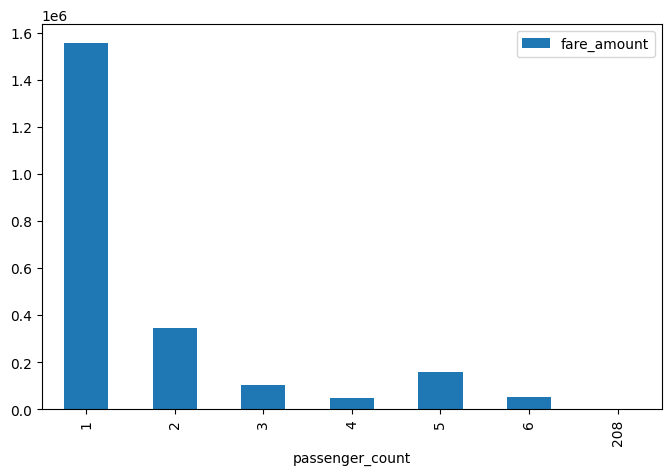

In [23]:
#fare amount against passenger_count

plt.figure(figsize=(8,5))
fare_count = df.groupby('passenger_count')['fare_amount'].sum().plot.bar(legend=True)

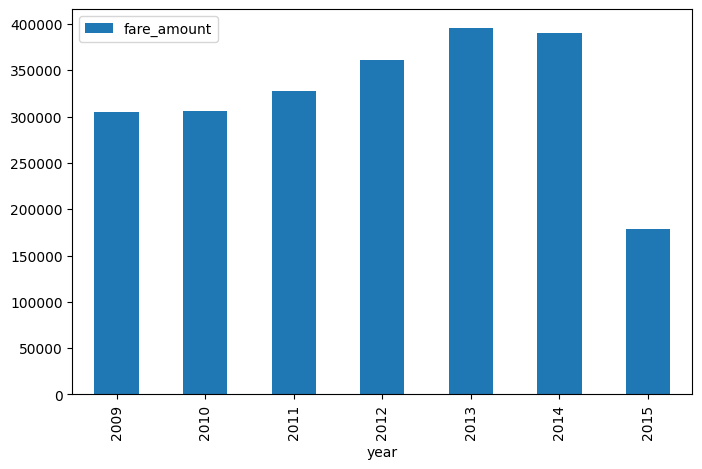

In [24]:
#fare_amount against year

plt.figure(figsize=(8,5))
fare_year = df.groupby('year')['fare_amount'].sum().plot.bar(legend=True)

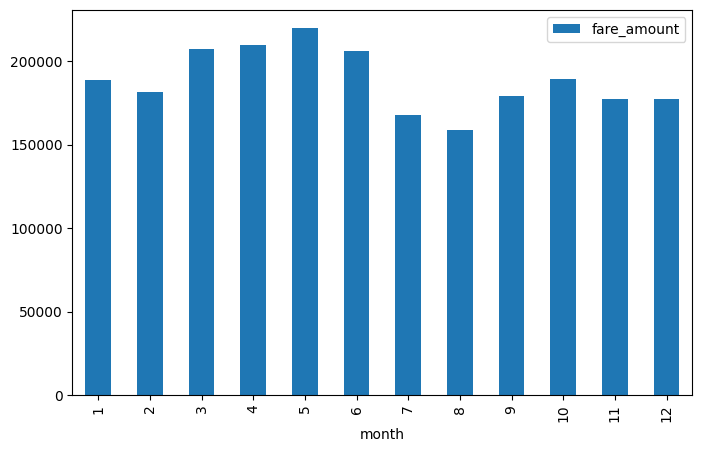

In [25]:
#fare amount against month

plt.figure(figsize=(8,5))
fare_month = df.groupby('month')['fare_amount'].sum().plot.bar(legend=True)

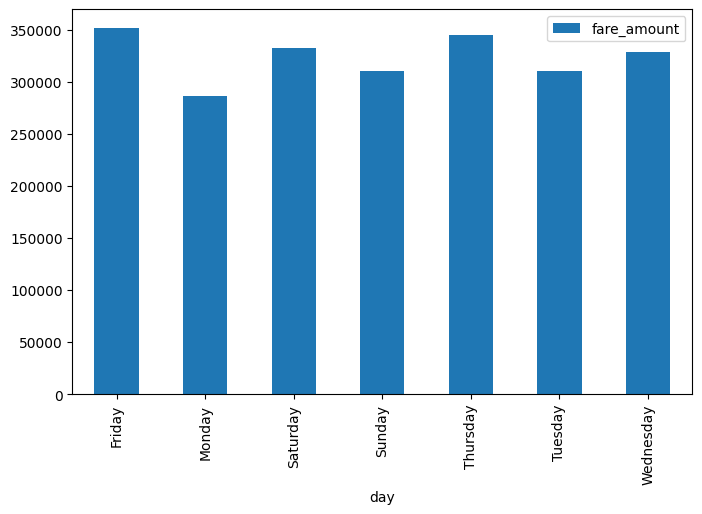

In [26]:
#fare amount against day

plt.figure(figsize=(8,5))
fare_day = df.groupby('day')['fare_amount'].sum().plot.bar(legend=True)

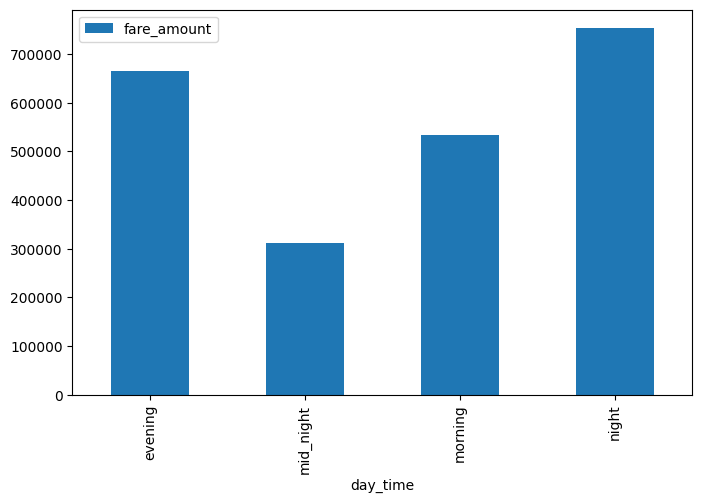

In [27]:
#fare amount against day time

plt.figure(figsize=(8,5))
fare_time = df.groupby('day_time')['fare_amount'].sum().plot.bar(legend=True)

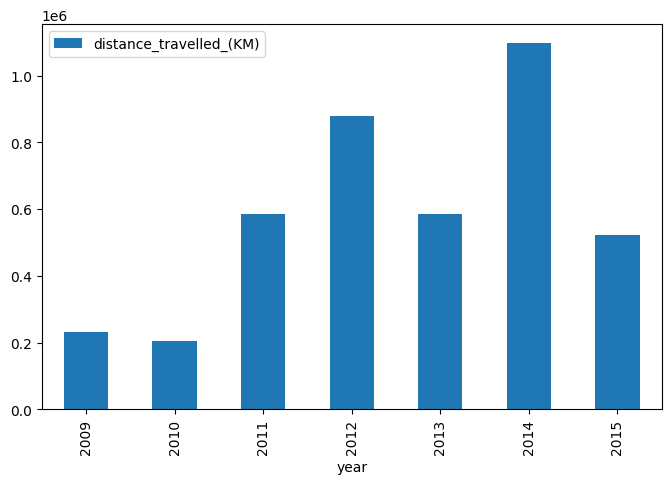

In [28]:
#distance travelled in year

plt.figure(figsize=(8,5))
fare_distance = df.groupby('year')['distance_travelled_(KM)'].sum().plot.bar(legend=True)

### Finding outliers

<Axes: ylabel='distance_travelled_(KM)'>

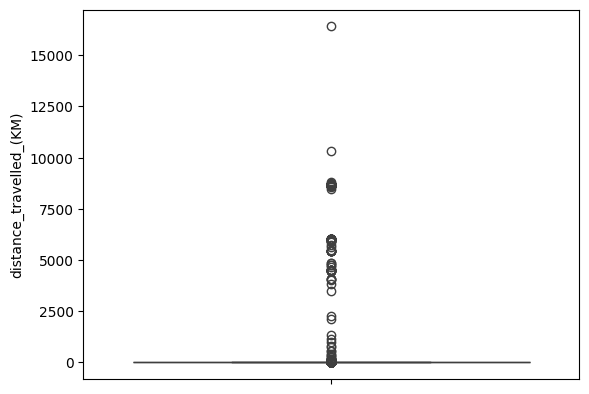

In [29]:
sns.boxplot(df['distance_travelled_(KM)'])

<Axes: ylabel='distance_travelled_(KM)'>

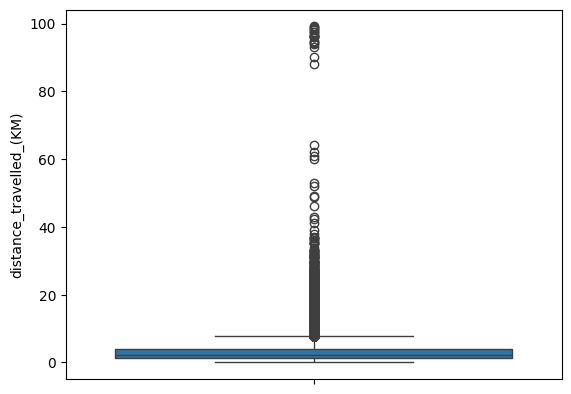

In [30]:
# Considering only fares less than 100 KM
df = df[df['distance_travelled_(KM)'] < 100]
sns.boxplot(df['distance_travelled_(KM)'])

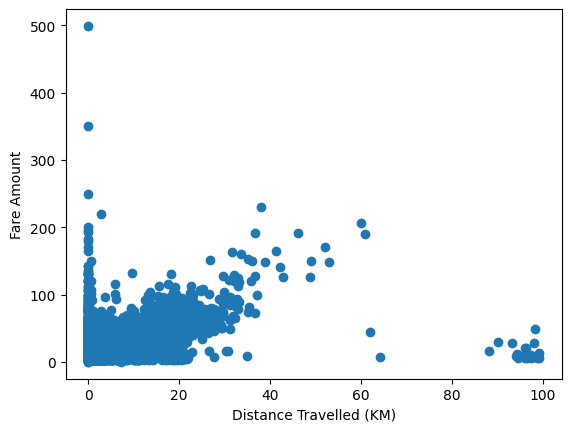

In [31]:
plt.scatter(df['distance_travelled_(KM)'],df['fare_amount'])
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Fare Amount')
plt.show()

## Feature Selection & Engineering

In [32]:
df.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day_time,distance_travelled_(KM)
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night,1.683323
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night,2.457590
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night,5.036377
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning,1.661683
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening,4.475450


In [33]:
df.drop(['index','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)
df.head()

,fare_amount,passenger_count,day,month,year,day_time,distance_travelled_(KM)
0,7.5,1,Thursday,5,2015,night,1.683323
1,7.7,1,Friday,7,2009,night,2.457590
2,12.9,1,Monday,8,2009,night,5.036377
3,5.3,3,Friday,6,2009,morning,1.661683
4,16.0,5,Thursday,8,2014,evening,4.475450


In [34]:
numerical = ['fare_amount','passenger_count','month','year','distance_travelled_(KM)']
categorical = ['day','day_time']



> Observations:
      1. Scalling the numerical columns.



In [35]:
scaler = StandardScaler()
scaler = StandardScaler()
columns_to_scale = df[['passenger_count','month', 'year','distance_travelled_(KM)']]
scaled = scaler.fit_transform(columns_to_scale)
df[['passenger_count','month', 'year','distance_travelled_(KM)']] = scaled

In [36]:
df.head()

,fare_amount,passenger_count,day,month,year,day_time,distance_travelled_(KM)
0,7.5,-0.498583,Thursday,-0.373366,1.752523,night,-0.425950
1,7.7,-0.498583,Friday,0.208242,-1.474647,night,-0.217831
2,12.9,-0.498583,Monday,0.499046,-1.474647,night,0.475334
3,5.3,0.945489,Friday,-0.082562,-1.474647,morning,-0.431766
4,16.0,2.389562,Thursday,0.499046,1.214661,evening,0.324559


## Setting Up Validation Framework

In [37]:
df_fulltrain,df_test = train_test_split(df,test_size=0.2,random_state=123)
df_train,df_val = train_test_split(df_fulltrain,test_size=0.25,random_state=123)

print('Training data shape: ',df_train.shape)
print('Testing data shape: ',df_test.shape)
print('Validation data shape: ',df_val.shape)



Training data shape:  (119235, 7)
Testing data shape:  (39746, 7)
Validation data shape:  (39745, 7)


In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fare_amount.values
y_val = df_val.fare_amount.values
y_test = df_test.fare_amount.values

del df_train['fare_amount']
del df_val['fare_amount']
del df_test['fare_amount']





> Encoding categorical Variables



In [39]:

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)



In [40]:
print('Training inputs size: ',X_train.shape)
print('Validation inputs size: ',X_val.shape)
print('Testing inputs size: ',X_test.shape)

Training inputs size:  (119235, 15)
Validation inputs size:  (39745, 15)
Testing inputs size:  (39746, 15)


## Traing Model

### Decistion Tree Regression Model

In [52]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_train_pred = dtr.predict(X_train)  #training accuracy
y_val_pred = dtr.predict(X_val)      #validation accuray
y_test_pred = dtr.predict(X_test)    #testing accurracy

train_mse = mean_squared_error(y_train,y_train_pred)
val_mse = mean_squared_error(y_val,y_val_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

print('Training rmse is: ',np.sqrt(train_mse))
print('Validation rmse is: ',np.sqrt(val_mse))
print('Testing rmse is: ',np.sqrt(test_mse))

print('\nTraining accuracy is: ',r2_score(y_train,y_train_pred))
print('Validation accuracy is: ',r2_score(y_val,y_val_pred))
print('Testing accuracy is: ',r2_score(y_test,y_test_pred))

Training rmse is:  1.1219534487091498
Validation rmse is:  7.4186446030487785
Testing rmse is:  7.1207335191213454

Training accuracy is:  0.9870150145495313
Validation accuracy is:  0.43555627025282695
Testing accuracy is:  0.488370560618266




> Observation:
      Model is overfitting on Training data.



### Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

y_train_pred = forest_reg.predict(X_train)  #training accuracy
y_val_pred = forest_reg.predict(X_val)      #validation accuray
y_test_pred = forest_reg.predict(X_test)    #testing accurracy

train_mse = mean_squared_error(y_train,y_train_pred)
val_mse = mean_squared_error(y_val,y_val_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

print('Training rmse is: ',np.sqrt(train_mse))
print('Validation rmse is: ',np.sqrt(val_mse))
print('Testing rmse is: ',np.sqrt(test_mse))

print('\nTraining accuracy is: ',r2_score(y_train,y_train_pred))
print('Validation accuracy is: ',r2_score(y_val,y_val_pred))
print('Testing accuracy is: ',r2_score(y_test,y_test_pred))

Training rmse is:  2.1395835679688875
Validation rmse is:  5.486074115699942
Testing rmse is:  5.192986767522339

Training accuracy is:  0.9527773560310026
Validation accuracy is:  0.6913296876590664
Testing accuracy is:  0.7278925131962393




> **Observation:**
      We have seen model is overfitting in both cases. so we will go for hyperparameter tunning to achieved the desired results.



## Hyperparameter Tunning

In [58]:
scores = []

for d in [3,4,5,6,7,10,15,20,30, None]:
  for s in [1,2,5,10,15,20,100,200,500]:
    dtr=DecisionTreeRegressor(max_depth=d,min_samples_leaf=s)
    dtr.fit(X_train,y_train)

    y_val_pred = dtr.predict(X_val)
    y_test_pred = dtr.predict(X_test)
    auc_val=r2_score(y_val,y_val_pred)
    auc_test=r2_score(y_test,y_test_pred)
    scores.append((d,s,auc_val,auc_test))

columns = ['max_depth', 'min_samples_leaf', 'auc_val','auc_test']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores.sort_values(by='auc_val', ascending=False).head()


,max_depth,min_samples_leaf,auc_val,auc_test
51,10.0,100,0.728210,0.745493
60,15.0,100,0.728148,0.745565
69,20.0,100,0.728105,0.745543
87,NaN,100,0.728104,0.745542
78,30.0,100,0.728104,0.745542


In [61]:
scores = []
for d in [5,10,15,20,30]:
  for s in [1,3,5,10,50,200]:
    rf = RandomForestRegressor(n_estimators=10,max_depth=d,min_samples_leaf=s,random_state=1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_val)
    auc=r2_score(y_val,y_pred)
    scores.append((d,s,auc))
columns = ['max_depth','min_samples_lef','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_lef,auc
9,10,10,0.733043
8,10,5,0.731389
10,10,50,0.731342
16,15,50,0.731328
28,30,50,0.731272




> **Observation:**
        After tunning we got to know that random forest model performs well than Decision Tree. The accuracy is 73% which is great achievement as compared to previous results. By doing feature selection and outlier analysis one can surely achieve better results.

